# Homework 05. Network Flow/Transportation

MSCA 32013 Optimization and Simulation Methods. University of Chicago.

Group 7. Ben Ossyra, Peter Pezon. Yawen Zhang. 

## Q1. Network flow.

Consider the network flow in the diagram below. Each circle contains a number representing a location. Each diamond shape contains a number representing the supply or demand for a given commodity at each location. Each octagon shape contains a number representing the cost (per unit) for transporting the commodity from one location to another. Each arrows represent the direction that the commodity can flow from a location to another.

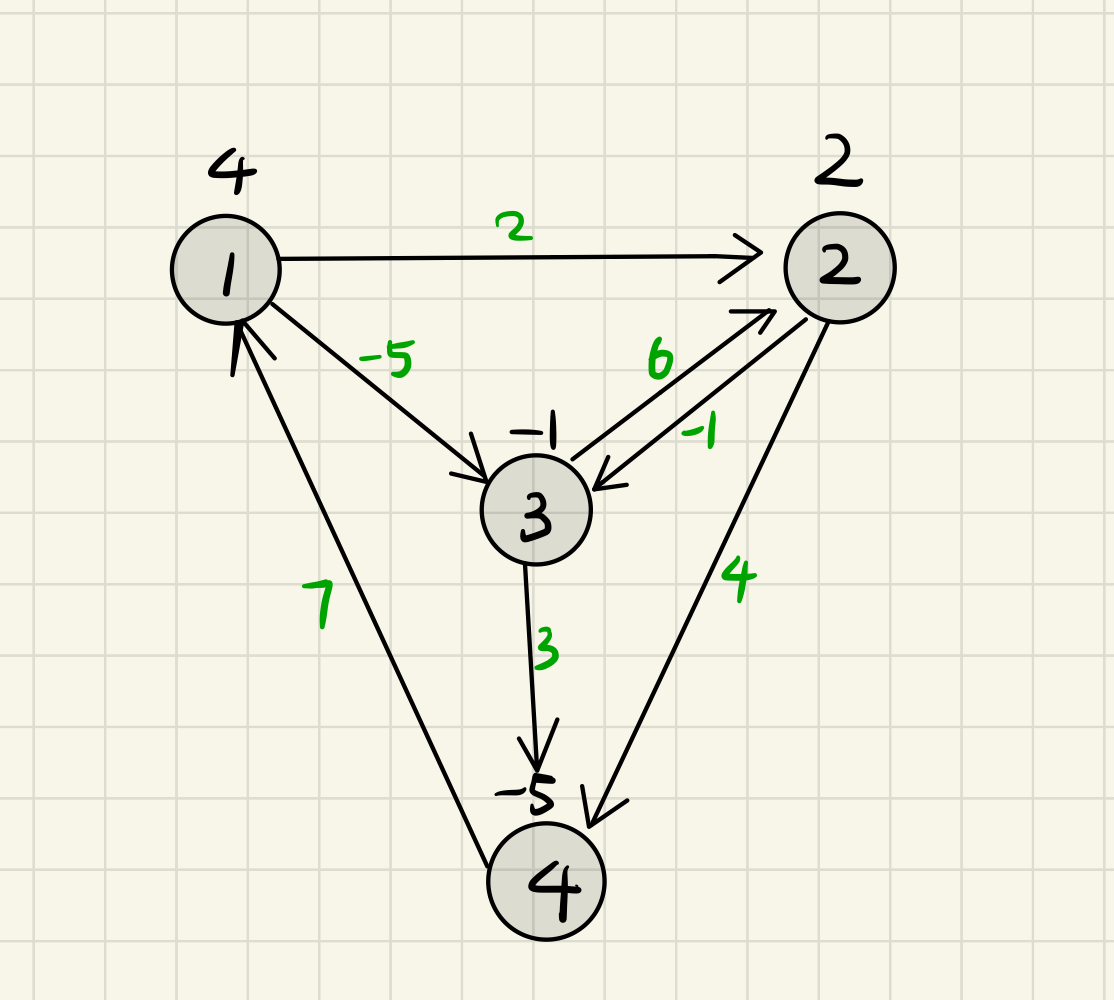

Each row represents each path, and column $c_{ij}$ represents the cost per unit on corresponding path:

| $n_i$ | $n_j$ | $c_{ij}$ |
| ----- | ------ | ----- | 
|  1    |	2	 |	2	 | 
|  1    |	3	 |	-5 | 
|  2    |	3	 |	-1 | 
|  2    |	4	 |	4 | 
|  3    |	4	 |	3 | 
|  3    |	2	 |	6 |
|  4    |	1	 |	7 |

#### Define our variables
There are 7 paths, so we have 7 variables:

* $x_{12}$ is the number of units that transported from location 1 to 2.
* $x_{13}$ is the number of units that transported from location 1 to 3.
* $x_{23}$ is the number of units that transported from location 2 to 3.
* $x_{24}$ is the number of units that transported from location 2 to 4.
* $x_{34}$ is the number of units that transported from location 3 to 4.
* $x_{32}$ is the number of units that transported from location 3 to 2.
* $x_{41}$ is the number of units that transported from location 4 to 1.

#### Regarding constraints:

For each location, the total units transported from the location minus the total units transported to the location must be equal to the supply (or demand in the case of a negative number):

$$ x_{12} + x_{13} - x_{41} = 4 $$
$$ x_{23} + x_{24} - x_{12} - x_{32} = 2 $$
$$ x_{34} + x_{32} - x_{23} - x_{13} = -1 $$
$$ x_{41} + x_{24} - x_{34} = -5 $$

#### The objective function is defined as:

$$ min\ \  2x_{12} - 5x_{13} -1 x_{23} + 4x_{24} + 3x_{34} + 6x_{32} + 7x_{41} $$


In [41]:
using CSV, DataFrames

In [42]:
df = CSV.read(joinpath(@__DIR__, "Network_Loc_Cost.csv"), DataFrame; delim = ',', header=true)

Row,Start Node,End Node,c_ij
,Int64,Int64,Int64
1,1,2,2
2,1,3,-5
3,2,3,-1
4,2,4,4
5,3,2,6
6,3,4,3
7,4,1,7


In [43]:
df2 = CSV.read(joinpath(@__DIR__, "Network_Supp_Dem.csv"), DataFrame; delim = ',', header=true)

Row,Node,Supply_Demand
,Int64,Int64
1,1,4
2,2,2
3,3,-1
4,4,-5


In [44]:
using JuMP, GLPK

myModel = Model(GLPK.Optimizer)
@variable(myModel, x12 >= 0)
@variable(myModel, x13 >= 0)
@variable(myModel, x23 >= 0)
@variable(myModel, x24 >= 0)
@variable(myModel, x34 >= 0)
@variable(myModel, x32 >= 0)
@variable(myModel, x41 >= 0)
@constraint(myModel, x12 + x13 - x41       == 4)
@constraint(myModel, x23 + x24 - x12 - x32 == 2)
@constraint(myModel, x34 + x32 - x23 - x13 == -1)
@constraint(myModel, x41 - x24 - x34       == -5)


@objective(myModel, Min,
    2*x12 - 5*x13 - 1*x23 + 4*x24 + 3*x34 + 6*x32 + 7*x41)
myModel



A JuMP Model
Minimization problem with:
Variables: 7
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 4 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 7 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: x12, x13, x23, x24, x32, x34, x41

In [45]:
print(myModel)

Min 2 x12 - 5 x13 - x23 + 4 x24 + 3 x34 + 6 x32 + 7 x41
Subject to
 x12 + x13 - x41 = 4.0
 -x12 + x23 + x24 - x32 = 2.0
 -x13 - x23 + x34 + x32 = -1.0
 -x24 - x34 + x41 = -5.0
 x12 ≥ 0.0
 x13 ≥ 0.0
 x23 ≥ 0.0
 x24 ≥ 0.0
 x34 ≥ 0.0
 x32 ≥ 0.0
 x41 ≥ 0.0


In [46]:
@time begin
    status = optimize!(myModel)
end
println("Objective value: ", JuMP.objective_value(myModel))
println("x12 = ", JuMP.value(x12))
println("x13 = ", JuMP.value(x13))
println("x23 = ", JuMP.value(x23))
println("x24 = ", JuMP.value(x24))
println("x34 = ", JuMP.value(x34))
println("x32 = ", JuMP.value(x32))
println("x41 = ", JuMP.value(x41))

  0.002676 seconds (190 allocations: 12.406 KiB)
Objective value: -7.0
x12 = 0.0
x13 = 4.0
x23 = 2.0
x24 = 0.0
x34 = 5.0
x32 = 0.0
x41 = 0.0


#### Optimal solution: 
Transport 4 units from location 1 to 3, transport 2 units from location 2 to 3, and  transport 5 units from location 3 to 4.  In this way, the total cost is -7 (we gain 7). 

#### Further Explanation

Node 1 starts with 4 units. We transfer all 4 units to node 3 with cost -5/per unit (reward). 

Cost of Node 1 -> Node 3 = -5 * 4 = -20

Node 2 starts with 2 units. We transfer all 2 units to node 3 with cost -1/per unit (reward).

Cost of Node 2 -> Node 3 = -1 * 2 = -2

Node 3 starts with no units and was transffered 6 units. There are now 6 units. It has a demand of 1 unit, so we transfer 5 units (leaving 1) to node 4 at a cost of 3/unit.

Cost of Node 3 -> Node 4 = 5 * 3 = 15

Node 4 starts with no units and was transferred 5 units. It had a demand of 5 units that is now satisfied.

The total cost of moving the units is -20 + -2 + 15 = -7

#### Constraint Verification

constraint 1:  
$ x_{12} + x_{13} - x_{41} = 4 $  
$ 4 + 0 - 0 = 4 $  
constraint 1 is confirmed

constraint 2:   
$ x_{23} + x_{24} - x_{12} - x_{32} = 2 $  
$ 6 + 0 - 4 - 0 = 2 $  
constraint 2 is confirmed

constraint 3:  
$ x_{34} + x_{32} - x_{23} - x_{13} = -1 $  
$ 5 + 0 - 2 - 4= -1 $  
constraint 3 is confirmed

constraint 4:  
$ x_{41} + x_{24} - x_{34} = -5 $  
$ 0 + 0 - 5 = -5 $  
constraint 4 is confirmed

## Q2. Transportation of goods

In [12]:
using JuMP, GLPK

m = Model(GLPK.Optimizer)

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

There are three factories and their existing supply of a good. 

$ S = \begin{bmatrix}
2800\\
5200\\
5800
\end{bmatrix} $

In [13]:
# Supplier inventory
S = [
    2800
    5200
    5800
]

n_suppliers = length(S)

3

There are seven retailers and their demand for the same good.

$ R = \begin{bmatrix}
1800\\
2400\\
1200\\
800\\
3400\\
2200\\
2000
\end{bmatrix} $

In [14]:
# Retailer demand
R = [
    1800
    2400
    1200
    800
    3400
    2200
    2000
]

n_retailers = length(R)

7

The matrix $C$ below summarizes the transportation cost (per unit) of the good from each factory to each retailer. $c_{ij}$ is the cost of transportating a good from supplier $i$ to retailer $j$.
 
$ C = \begin{bmatrix}
78 & 28 & 22 & 28 & 32 & 164 & 16\\
54 & 0 & 24 & 0 & 52 & 190 & 34\\
48 & 28 & 34 & 26 & 56 & 198 & 40
\end{bmatrix} $

In [15]:
# Cost of transportation
C = [
    78  28  22  28  32  164 16;
    54  0   24  0   52  190 34;
    48  28  34  26  56  198 40;
]

3×7 Matrix{Int64}:
 78  28  22  28  32  164  16
 54   0  24   0  52  190  34
 48  28  34  26  56  198  40

Let $X$ be a $ 3 \times 7 $ matrix where $x_{ij}$ is the quantity transported from Supplier $i$ to Retailer $j$. 

In [16]:
# Define variables
@variable(m, x[1:n_suppliers,1:n_retailers] >= 0)

3×7 Matrix{VariableRef}:
 x[1,1]  x[1,2]  x[1,3]  x[1,4]  x[1,5]  x[1,6]  x[1,7]
 x[2,1]  x[2,2]  x[2,3]  x[2,4]  x[2,5]  x[2,6]  x[2,7]
 x[3,1]  x[3,2]  x[3,3]  x[3,4]  x[3,5]  x[3,6]  x[3,7]

The objective is to distribute the good from the suppliers to the retailers at the minimal cost of transporting goods from supplier $i$ to retailer $j$. The total cost is calculated by sum total of the quantity of goods transported from supplier $i$ to retailer $j$ times the cost of transportating a unit of goods from supplier $i$ to retailer $j$. 

$ \min \sum \sum x_{i,j} c_{i,j} $

In [17]:
# Define objective
@objective(m, Min,
    sum(x[s,r]*C[s,r]
        for s=1:n_suppliers,
            r=1:n_retailers))

78 x[1,1] + 28 x[1,2] + 22 x[1,3] + 28 x[1,4] + 32 x[1,5] + 164 x[1,6] + 16 x[1,7] + 54 x[2,1] + 24 x[2,3] + 52 x[2,5] + 190 x[2,6] + 34 x[2,7] + 48 x[3,1] + 28 x[3,2] + 34 x[3,3] + 26 x[3,4] + 56 x[3,5] + 198 x[3,6] + 40 x[3,7]

Constraints: Two routes are not available and shown missing transportation costs.

$x_{B2} = 0, x_{B4} = 0 $

In [18]:
# Define constraint: two routes are not available
@constraint(m, x[2,2] == 0)
@constraint(m, x[2,4] == 0)

x[2,4] = 0.0

The demand of each retailer must be met.


In [19]:
# Define constraint: Retailer demand is met
for r=1:n_retailers
    @constraint(m, sum(x[s,r] for s=1:n_suppliers) == R[r])
end

Suppliers cannot transport more goods than they have supplies of.

In [20]:
# Define constraint: Suppliers aren't overdrawn
for s=1:n_suppliers
    @constraint(m, sum(x[s,r] for r=1:n_retailers) == S[s])
end

In [21]:
# Print model
print(m)

Min 78 x[1,1] + 28 x[1,2] + 22 x[1,3] + 28 x[1,4] + 32 x[1,5] + 164 x[1,6] + 16 x[1,7] + 54 x[2,1] + 24 x[2,3] + 52 x[2,5] + 190 x[2,6] + 34 x[2,7] + 48 x[3,1] + 28 x[3,2] + 34 x[3,3] + 26 x[3,4] + 56 x[3,5] + 198 x[3,6] + 40 x[3,7]
Subject to
 x[2,2] = 0.0
 x[2,4] = 0.0
 x[1,1] + x[2,1] + x[3,1] = 1800.0
 x[1,2] + x[2,2] + x[3,2] = 2400.0
 x[1,3] + x[2,3] + x[3,3] = 1200.0
 x[1,4] + x[2,4] + x[3,4] = 800.0
 x[1,5] + x[2,5] + x[3,5] = 3400.0
 x[1,6] + x[2,6] + x[3,6] = 2200.0
 x[1,7] + x[2,7] + x[3,7] = 2000.0
 x[1,1] + x[1,2] + x[1,3] + x[1,4] + x[1,5] + x[1,6] + x[1,7] = 2800.0
 x[2,1] + x[2,2] + x[2,3] + x[2,4] + x[2,5] + x[2,6] + x[2,7] = 5200.0
 x[3,1] + x[3,2] + x[3,3] + x[3,4] + x[3,5] + x[3,6] + x[3,7] = 5800.0
 x[1,1] ≥ 0.0
 x[2,1] ≥ 0.0
 x[3,1] ≥ 0.0
 x[1,2] ≥ 0.0
 x[2,2] ≥ 0.0
 x[3,2] ≥ 0.0
 x[1,3] ≥ 0.0
 x[2,3] ≥ 0.0
 x[3,3] ≥ 0.0
 x[1,4] ≥ 0.0
 x[2,4] ≥ 0.0
 x[3,4] ≥ 0.0
 x[1,5] ≥ 0.0
 x[2,5] ≥ 0.0
 x[3,5] ≥ 0.0
 x[1,6] ≥ 0.0
 x[2,6] ≥ 0.0
 x[3,6] ≥ 0.0
 x[1,7] ≥ 0.0
 x[2,

In [22]:
# Set forth and optimize
@time begin
    status = optimize!(m)
end

  0.003496 seconds (300 allocations: 25.875 KiB)


In [23]:
obj = JuMP.objective_value(m)
x_star = JuMP.value.(x)

println("Objective value: ", obj)

Objective value: 800000.0


In [24]:
obj = JuMP.objective_value(m)
x_star = JuMP.value.(x)

println("Objective value: ", obj)

supplier_names = ["A", "B", "C"]
for s=1:n_suppliers, r=1:n_retailers
    s_name = supplier_names[s]
    println("Supplier $s_name => Retailer $r: ", x_star[s, r])
end

Objective value: 800000.0
Supplier A => Retailer 1: 0.0
Supplier A => Retailer 2: 0.0
Supplier A => Retailer 3: 0.0
Supplier A => Retailer 4: 0.0
Supplier A => Retailer 5: 600.0
Supplier A => Retailer 6: 2200.0
Supplier A => Retailer 7: 0.0
Supplier B => Retailer 1: 0.0
Supplier B => Retailer 2: 0.0
Supplier B => Retailer 3: 1200.0
Supplier B => Retailer 4: 0.0
Supplier B => Retailer 5: 2000.0
Supplier B => Retailer 6: 0.0
Supplier B => Retailer 7: 2000.0
Supplier C => Retailer 1: 1800.0
Supplier C => Retailer 2: 2400.0
Supplier C => Retailer 3: 0.0
Supplier C => Retailer 4: 800.0
Supplier C => Retailer 5: 800.0
Supplier C => Retailer 6: 0.0
Supplier C => Retailer 7: 0.0


The minimal cost is $800,000.

##### Supplier A will supply:  
600 units to Retailer 5  
2200 units to Retailer 6  

##### Supplier B will supply:  
1200 units to Retailer 3  
2000 units to Retailer 5  
2000 units to Retailer 7  

##### Supplier C will supply:  
1800 units to Retailer 1  
2400 units to Retailer 2  
800 units to Retailer 4  
800 units to Retailer 5  

The minimum cost of moving the goods is $800,000.

Below is a table showing the number of goods distributed from each supplier to each retailer. The supplier is indexed by row and the retailer is indexed by column.

In [25]:
x_star

3×7 Matrix{Float64}:
    0.0     0.0     0.0    0.0   600.0  2200.0     0.0
    0.0     0.0  1200.0    0.0  2000.0     0.0  2000.0
 1800.0  2400.0     0.0  800.0   800.0     0.0     0.0